# Exercise 1: PCA, ICA and Sparse Coding

Contributers:
1:
2:

r = 0.05, average neighbors = 2.07


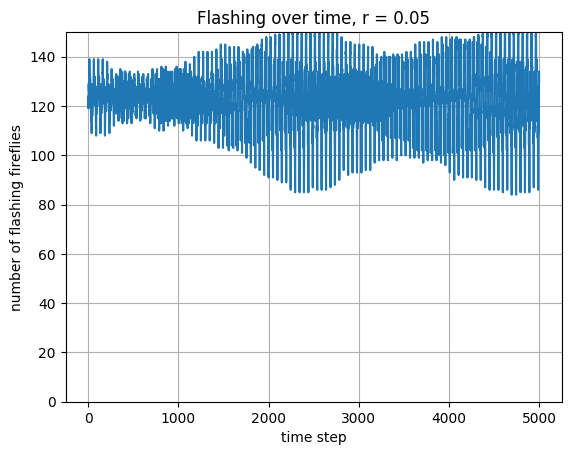

r = 0.10, average neighbors = 6.98


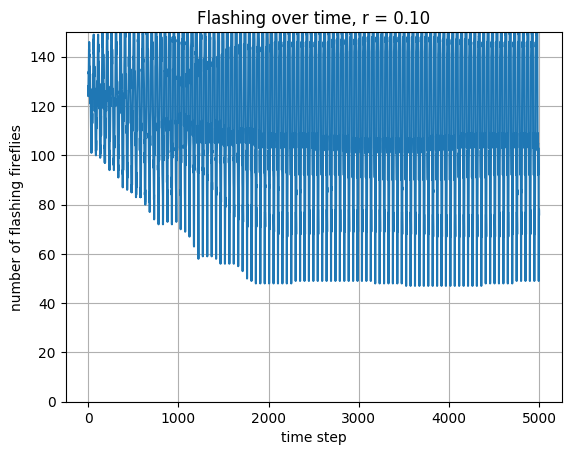

r = 0.50, average neighbors = 115.53


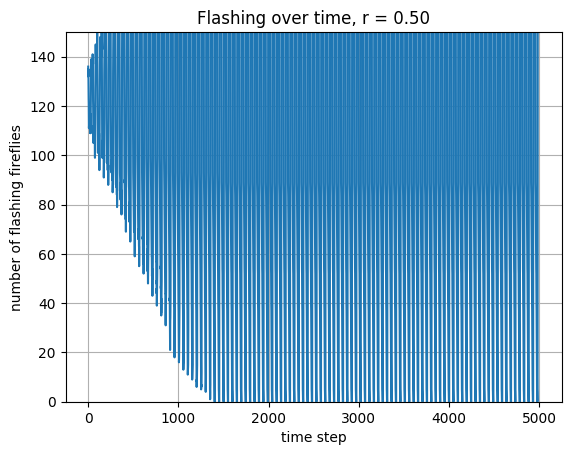

r = 1.40, average neighbors = 249.00


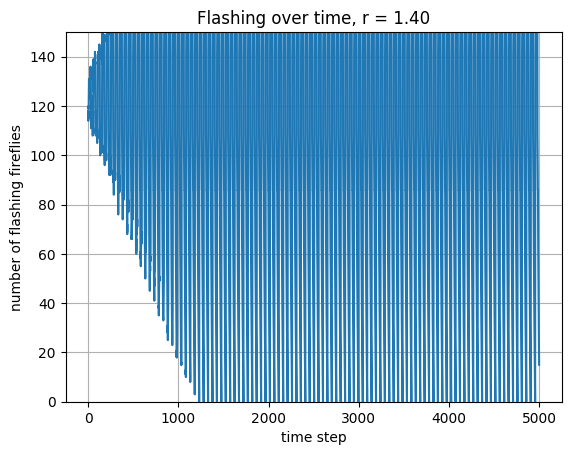

[1/56] r = 0.025, average double amplitude = 36.52
[2/56] r = 0.050, average double amplitude = 53.90
[3/56] r = 0.075, average double amplitude = 71.12
[4/56] r = 0.100, average double amplitude = 90.28
[5/56] r = 0.125, average double amplitude = 114.86
[6/56] r = 0.150, average double amplitude = 143.96
[7/56] r = 0.175, average double amplitude = 171.78
[8/56] r = 0.200, average double amplitude = 185.06
[9/56] r = 0.225, average double amplitude = 199.42
[10/56] r = 0.250, average double amplitude = 219.00
[11/56] r = 0.275, average double amplitude = 228.72
[12/56] r = 0.300, average double amplitude = 227.04
[13/56] r = 0.325, average double amplitude = 239.08
[14/56] r = 0.350, average double amplitude = 239.14
[15/56] r = 0.375, average double amplitude = 243.68
[16/56] r = 0.400, average double amplitude = 244.52
[17/56] r = 0.425, average double amplitude = 247.04
[18/56] r = 0.450, average double amplitude = 242.60
[19/56] r = 0.475, average double amplitude = 240.46
[20/56

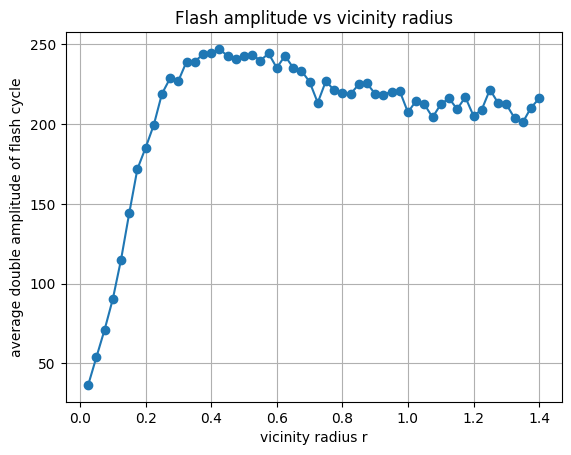

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 250         # number of fireflies
L = 50          # cycle length (time steps)
FLASH_STEPS = L // 2


def create_positions(N):
    """Random positions in [0,1] x [0,1]."""
    x = np.random.rand(N)
    y = np.random.rand(N)
    return x, y


def neighbor_matrix(x, y, r):
    """Boolean NxN matrix: neighbors[i, j] = True if j is neighbor of i."""
    dx = x[:, None] - x[None, :]
    dy = y[:, None] - y[None, :]
    dist2 = dx**2 + dy**2
    neighbors = dist2 < r**2
    # a firefly is not its own neighbor
    np.fill_diagonal(neighbors, False)
    return neighbors


def average_neighbors(neighbors):
    counts = neighbors.sum(axis=1)
    return counts.mean()


def run_simulation(r, T, N=250, L=50):
    """
    Run one simulation for given vicinity radius r and duration T.
    Returns:
        num_flashing_over_time : array of length T
        neighbors              : boolean NxN neighbor matrix
    """
    FLASH_STEPS = L // 2

    # positions and neighbors
    x, y = create_positions(N)
    neighbors = neighbor_matrix(x, y, r)

    # random initial phases 0..L-1
    phase = np.random.randint(0, L, size=N)

    num_flashing_over_time = np.zeros(T, dtype=int)

    for t in range(T):
        # who is flashing at current time?
        flashing = phase < FLASH_STEPS
        num_flashing_over_time[t] = flashing.sum()

        # --- decide who corrects their clock now ---

        # number of neighbors for each firefly
        num_neighbors = neighbors.sum(axis=1)
        has_neighbors = num_neighbors > 0

        # number of flashing neighbors
        num_flashing_n = (neighbors & flashing).sum(axis=1)

        majority_flashing = np.zeros(N, dtype=bool)
        majority_flashing[has_neighbors] = (
            num_flashing_n[has_neighbors] > num_neighbors[has_neighbors] / 2.0
        )

        # fireflies that just started flashing this step
        just_started = (phase == 0)

        # only those that just started and see majority flashing correct
        correction = (just_started & majority_flashing).astype(int)

        # phases upgrade synchronously
        phase = (phase + 1 + correction) % L

    return num_flashing_over_time, neighbors

def part_a():
    radii = [0.05, 0.1, 0.5, 1.4]
    T = 5000

    for r in radii:
        num_flashing, neighbors = run_simulation(r, T, N=N, L=L)
        avg_nb = average_neighbors(neighbors)
        print(f"r = {r:.2f}, average neighbors = {avg_nb:.2f}")

        plt.figure()
        plt.plot(num_flashing)
        plt.ylim(0, 150)
        plt.xlabel("time step")
        plt.ylabel("number of flashing fireflies")
        plt.title(f"Flashing over time, r = {r:.2f}")
        plt.grid(True)
        plt.show()


def estimate_double_amplitude(num_flashing, L=50):
    """Double amplitude from the last cycle = max(F) - min(F), where F is last_cycle."""
    last_cycle = num_flashing[-L:]
    return last_cycle.max() - last_cycle.min()


def part_b():
    T = 5000
    L = 50
    runs_per_r = 50

    rs = np.arange(0.025, 1.4001, 0.025)  # from 0.025 to 1.4 with 0.025 step
    avg_double_amplitudes = []

    for r_idx, r in enumerate(rs, start=1):
        amps = []
        for run in range(runs_per_r):
            num_flashing, _ = run_simulation(r, T, N=N, L=L)
            amp = estimate_double_amplitude(num_flashing, L=L)
            amps.append(amp)
        avg_amp = np.mean(amps)
        avg_double_amplitudes.append(avg_amp)
        print(f"[{r_idx}/{len(rs)}] r = {r:.3f}, average double amplitude = {avg_amp:.2f}")

    avg_double_amplitudes = np.array(avg_double_amplitudes)

    plt.figure()
    plt.plot(rs, avg_double_amplitudes, marker='o')
    plt.xlabel("vicinity radius r")
    plt.ylabel("average double amplitude of flash cycle")
    plt.title("Flash amplitude vs vicinity radius")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    part_a()
    part_b()
